In [115]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
original = pd.read_csv("../../data/twitter-scraped-data/general-ukraine/processed.csv")

In [118]:
data = original.copy()

In [119]:
data = data.sort_values(by=['score'], ascending=False)

In [120]:
data.describe()

,id,conversation_id,user_id_str,nlikes,nreplies,nretweets,score
count,1.460228e+06,1.460228e+06,1.460228e+06,1.460228e+06,1.460228e+06,1.460228e+06,1.460228e+06
mean,1.510701e+18,1.510309e+18,8.283999e+17,1.200491e+01,1.270619e+00,1.728529e+00,1.500405e+01
std,2.250596e+15,1.087000e+16,6.081371e+17,1.199462e+02,1.418713e+01,1.784062e+01,1.427308e+02
min,1.503522e+18,1.046612e+10,5.063000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.508855e+18,1.508773e+18,3.017288e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.510915e+18,1.510757e+18,1.050084e+18,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.512427e+18,1.512366e+18,1.377519e+18,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00
max,1.514741e+18,1.514741e+18,1.514724e+18,2.074200e+04,4.333000e+03,2.638000e+03,2.239100e+04


**Łącznie jest 1,4 milona tweetów. Dane obejmują okres od 23 marca 2022 roku do 11 kwietnia 2022 roku.**

In [121]:
data.head()

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,photos,nlikes,nreplies,nretweets,search,reply_to,score,cleaned_tweet
746939,1511043327201886220,1511043327201886220,2022-04-04 20:09:37,Niespełna miesiąc temu przytulalam na korytarz...,[],1044688849945993216,AlekSarna,Aleksandra Sarna,https://twitter.com/AlekSarna/status/151104332...,[],[],20742,285,1364,ukrainy,[],22391,Niespełna miesiąc temu przytulalam na korytarz...
749438,1510856044771217414,1510856044771217414,2022-04-04 07:45:26,Iga Świątek przekazała swoją wygraną z Miami -...,[],920540646238248960,AnonymousNoWar,AnonymousNoWar,https://twitter.com/AnonymousNoWar/status/1510...,[],['https://pbs.twimg.com/media/FPejjq-XMAcuZuG....,17695,313,2638,ukrainy,[],20646,Iga Świątek przekazała swoją wygraną z Miami -...
1189381,1512721032922210304,1512721032922210304,2022-04-09 11:16:13,"Zdecydowałam, że jutro nie zostaną uruchomione...",[],87229807,HannaZdanowska,Hanna Zdanowska,https://twitter.com/HannaZdanowska/status/1512...,[],[],15485,1008,969,wojny,[],17462,"Zdecydowałam, że jutro nie zostaną uruchomione..."
263089,1508908369599414275,1508908369599414275,2022-03-29 22:46:04,Piękny mecz. Gratulujemy Polakom wygranej!,[],1217960047,AmbSzweWarszawa,Ambasada Szwecji,https://twitter.com/AmbSzweWarszawa/status/150...,[],[],15479,249,577,warszawy,[],16305,Piękny mecz. Gratulujemy Polakom wygranej!
1288591,1513444605316014080,1513444605316014080,2022-04-11 11:11:27,"Minęła kolejna rocznica zamachu na prawdę, prz...",[],375146901,donaldtusk,Donald Tusk,https://twitter.com/donaldtusk/status/15134446...,[],[],11337,2811,1720,polaków,[],15868,"Minęła kolejna rocznica zamachu na prawdę, prz..."


In [122]:
data['tweet_lower'] = data['tweet'].str.lower()

In [123]:
searchfor = ['ukropolin', 'ukropolonia']
data = data[data['tweet_lower'].str.contains('|'.join(searchfor))]

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 330245 to 330194
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               628 non-null    int64 
 1   conversation_id  628 non-null    int64 
 2   date             628 non-null    object
 3   tweet            628 non-null    object
 4   hashtags         628 non-null    object
 5   user_id_str      628 non-null    int64 
 6   username         628 non-null    object
 7   name             628 non-null    object
 8   link             628 non-null    object
 9   urls             628 non-null    object
 10  photos           628 non-null    object
 11  nlikes           628 non-null    int64 
 12  nreplies         628 non-null    int64 
 13  nretweets        628 non-null    int64 
 14  search           628 non-null    object
 15  reply_to         628 non-null    object
 16  score            628 non-null    int64 
 17  cleaned_tweet    628 non-nu

In [125]:
# 15 najpopularniejszych tweetów
data[:15]#.to_excel("15-most-popular-tweets.xlsx")

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,photos,nlikes,nreplies,nretweets,search,reply_to,score,cleaned_tweet,tweet_lower
330245,1507441217524617219,1507441217524617219,2022-03-25 20:36:07,Witajcie w Ukropolin... poszło szybciej i spra...,[],829404955048103936,mietek_smutny,Mieczysław Prawy 🇵🇱 🥇💯🩸PureBlood🩸,https://twitter.com/mietek_smutny/status/15074...,[],[],382,66,97,ukropolin,[],545,Witajcie w Ukropolin... poszło szybciej i spra...,witajcie w ukropolin... poszło szybciej i spra...
105839,1508156669670440965,1508156669670440965,2022-03-27 20:59:04,"Mowilo się od początku, że Zelensky to cwaniak...",[],1504958177305104386,garmonbozja,Garmonbozja,https://twitter.com/garmonbozja/status/1508156...,[],['https://pbs.twimg.com/media/FO4MfqYWUAoqiBJ....,166,6,89,polska,[],261,"Mowilo się od początku, że Zelensky to cwaniak...","mowilo się od początku, że zelensky to cwaniak..."
330218,1507692797922533379,1507692797922533379,2022-03-26 13:15:49,Ukropolin pełną gębą. Przodkowie się w grobach...,[],1360507036799238145,KNerwosol,🄺🄰🄽🄰🄻🄸🄰💪🇵🇱 𝖂𝖆𝖙𝖆𝖍𝖆,https://twitter.com/KNerwosol/status/150769279...,[],[],116,9,37,ukropolin,[],162,Ukropolin pełną gębą. Przodkowie się w grobach...,ukropolin pełną gębą. przodkowie się w grobach...
330235,1507524458172534790,1507524458172534790,2022-03-26 02:06:53,"W ten kraju, w ukrainie. Ten kraju już nie będ...",[],1053599002548158464,Krzychu74706173,"Dobry, Zły i Brzydki",https://twitter.com/Krzychu74706173/status/150...,[],[],68,6,14,ukropolin,[],88,"W ten kraju, w ukrainie. Ten kraju już nie będ...","w ten kraju, w ukrainie. ten kraju już nie będ..."
14082,1504517863234842643,1504446658058362885,2022-03-17 18:59:45,@robertneska Żydzi organizują szkolenie warstw...,[],1522897994,ArturKrolica,Artur Królica 🇵🇱,https://twitter.com/ArturKrolica/status/150451...,[],[],67,1,13,Banderowcy,"[{'screen_name': 'robertneska', 'name': 'Rober...",81,Żydzi organizują szkolenie warstwy strażników ...,@robertneska żydzi organizują szkolenie warstw...
330223,1507677050374664197,1507677050374664197,2022-03-26 12:13:14,To jeszcze Polska czy już ukropolin? https://...,[],1360507036799238145,KNerwosol,🄺🄰🄽🄰🄻🄸🄰💪🇵🇱 𝖂𝖆𝖙𝖆𝖍𝖆,https://twitter.com/KNerwosol/status/150767705...,[],[],49,9,10,ukropolin,[],68,To jeszcze Polska czy już ukropolin?,to jeszcze polska czy już ukropolin? https://...
661760,1511083557355388928,1511027407138045960,2022-04-04 22:49:29,@BWszechpolski Bo tak twierdza Ukraincy i medi...,[],1374979036137447428,DownunderTom,Tom,https://twitter.com/DownunderTom/status/151108...,[],[],55,6,2,ukraińcy,"[{'screen_name': 'BWszechpolski', 'name': 'Bru...",63,Bo tak twierdza Ukraincy i media Ukropolin. Dl...,@bwszechpolski bo tak twierdza ukraincy i medi...
30014,1508839995469086726,1508780510738321415,2022-03-29 18:14:22,@RzecznikMSZ @GrzegorzKrupa7 @MSZ_RP Ale wy ni...,['ukropolin'],346553626,terminator3_4,Arkadiusz,https://twitter.com/terminator3_4/status/15088...,[],[],46,1,11,żydom,"[{'screen_name': 'RzecznikMSZ', 'name': 'Łukas...",58,Ale wy nie musicie prostować swoich wypowiedzi...,@rzecznikmsz @grzegorzkrupa7 @msz_rp ale wy ni...
978330,1511770847060664333,1511770847060664333,2022-04-06 20:20:31,"Prawi pisozjebani, to co, już oficjalnie w Pol...",[],1053599002548158464,Krzychu74706173,"Dobry, Zły i Brzydki",https://twitter.com/Krzychu74706173/status/151...,[],[],43,2,12,polsce,[],57,"Prawi pisozjebani, to co, już oficjalnie w Pol...","prawi pisozjebani, to co, już oficjalnie w pol..."
641585,1511051140548464644,1511051140548464644,2022-04-04 20:40:40,To teraz ukropoliniacy zaczną czcić pamięć pom...,[],1455622239395713025,MiZmi77,Dla Przyjaciół Misiu,https://twitter.com/MiZmi77/status/15110511405...,[],[],41,4,10,wołyniu,[],55,To teraz ukropoliniacy zaczną czcić pamięć pom...,to teraz ukropoliniacy zaczną czcić pamięć pom...


In [126]:
# Pierwsze dziesięć tweetów
data.sort_values(by='date')[:10]#.to_excel("first-10-tweets.xlsx")

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,photos,nlikes,nreplies,nretweets,search,reply_to,score,cleaned_tweet,tweet_lower
17866,1504088796534616073,1504074941230166019,2022-03-16 14:34:48,@NikifPL @Antysyst Niedługo wybory na prezesa ...,[],1327261969804632064,AkkarinV,Pan Samochodzik,https://twitter.com/AkkarinV/status/1504088796...,[],[],3,1,0,Bandera,"[{'screen_name': 'NikifPL', 'name': 'Nikif', '...",4,Niedługo wybory na prezesa Ukropolin i jestem ...,@nikifpl @antysyst niedługo wybory na prezesa ...
8313,1504461053391945734,1504393166262312967,2022-03-17 15:14:01,@MarioRebeliant @AnnaMada2 @lis_tomasz @jacek_...,[],2180706896,miejskiziom,Wiektoś ktoto,https://twitter.com/miejskiziom/status/1504461...,[],['https://pbs.twimg.com/media/FODrWtpWYAklTWh....,0,0,0,Wołyń,"[{'screen_name': 'MarioRebeliant', 'name': 'Ma...",0,Komitet Nauk Historycznych PAN odwołuję konkur...,@mariorebeliant @annamada2 @lis_tomasz @jacek_...
14082,1504517863234842643,1504446658058362885,2022-03-17 18:59:45,@robertneska Żydzi organizują szkolenie warstw...,[],1522897994,ArturKrolica,Artur Królica 🇵🇱,https://twitter.com/ArturKrolica/status/150451...,[],[],67,1,13,Banderowcy,"[{'screen_name': 'robertneska', 'name': 'Rober...",81,Żydzi organizują szkolenie warstwy strażników ...,@robertneska żydzi organizują szkolenie warstw...
14076,1504531328607432706,1504530626434719744,2022-03-17 19:53:16,@konrad_cybulski Pokazują kto jest najważniejs...,[],1501136954120978432,cozpolska,cozpolską 🇵🇱,https://twitter.com/cozpolska/status/150453132...,[],[],1,0,1,Banderowcy,"[{'screen_name': 'konrad_cybulski', 'name': 'C...",2,Pokazują kto jest najważniejszy w ukropolin. P...,@konrad_cybulski pokazują kto jest najważniejs...
11750,1504856922582835207,1504777852104945668,2022-03-18 17:27:03,@Stanislaw_SP @SolidarnaPL @ewawen Nooo nie.. ...,[],1462163709648900103,thort2807,Wojciech Witkowski,https://twitter.com/thort2807/status/150485692...,[],[],0,0,0,Banderowców,"[{'screen_name': 'Stanislaw_SP', 'name': 'Stan...",0,Nooo nie.. naprawdę? Ten półtorametrowy kutas ...,@stanislaw_sp @solidarnapl @ewawen nooo nie.. ...
11645,1505144573546409985,1505136421585174533,2022-03-19 12:30:05,@BWszechpolski UkroPolin samo się nie zbuduje....,[],1504938964423225348,Marek38077870,Odbudowuję konto po blokadzie (konto nr.5),https://twitter.com/Marek38077870/status/15051...,[],[],0,0,0,Banderowców,"[{'screen_name': 'BWszechpolski', 'name': 'Bru...",0,UkroPolin samo się nie zbuduje. Mając za sąsia...,@bwszechpolski ukropolin samo się nie zbuduje....
2747,1505150996992905217,1504917747687378952,2022-03-19 12:55:36,@michalsocha89 @PanasiukPiotr Wyłącz ten TVN. ...,[],1486303345392377856,PatrykWesoly,Gennaro Savastano 🇵🇱,https://twitter.com/PatrykWesoly/status/150515...,[],[],3,1,0,Naziści,"[{'screen_name': 'michalsocha89', 'name': 'Soc...",4,"Wyłącz ten TVN. Batalion Azov to naziści, zoba...",@michalsocha89 @panasiukpiotr wyłącz ten tvn. ...
13884,1505234363423809541,1505234363423809541,2022-03-19 18:26:52,ukropolin .... banderowcy z bronia welcome Po...,[],568746775,bak_wanda,wanda bak,https://twitter.com/bak_wanda/status/150523436...,['https://www.msn.com/pl-pl/wiadomosci/polska/...,[],0,0,1,Banderowcy,[],1,ukropolin .... banderowcy z bronia welcome Pol...,ukropolin .... banderowcy z bronia welcome po...
15606,1505242279627440129,1505242279627440129,2022-03-19 18:58:20,"W czasach PRLu nie można było mówić o Katyniu,...",[],1492835436401762307,NZLysenki,Nagroda_Złotego_Łysenki 🇵🇱,https://twitter.com/NZLysenki/status/150524227...,[],[],0,0,0,Wołyniu,[],0,"W czasach PRLu nie można było mówić o Katyniu,...","w czasach prlu nie można było mówić o katyniu,..."
11461,1505666948121743360,1505666948121743360,2022-03-20 23:05:49,PILNE !! UWAGA - PIERWSZY W UKROPOLIN PROCES P...,[],3913712783,59Mariola,Mariola Olejniczak,https://twitter.com/59Mariola/status/150566694...,['https://miziaforum.com/2022/03/19/pilne-uwag...,[],0,0,0,Banderowców,[],0,PILNE !! UWAGA - PIE

In [127]:
# Najpopularniejsze 15 konta biorąc pod uwage sume reakcji
data.groupby(by='username').sum().reset_index()[['username','score']].sort_values(by='score', ascending=False)[:15]#.to_excel("top-15-accounts.xlsx")

,username,score
253,mietek_smutny,639.0
80,KNerwosol,309.0
225,garmonbozja,280.0
91,Krzychu74706173,175.0
24,Baba_yaga_bum,158.0
244,leszek105,118.0
19,ArturKrolica,82.0
62,HanterPoen,78.0
215,caninnwo,73.0
124,MiZmi77,72.0


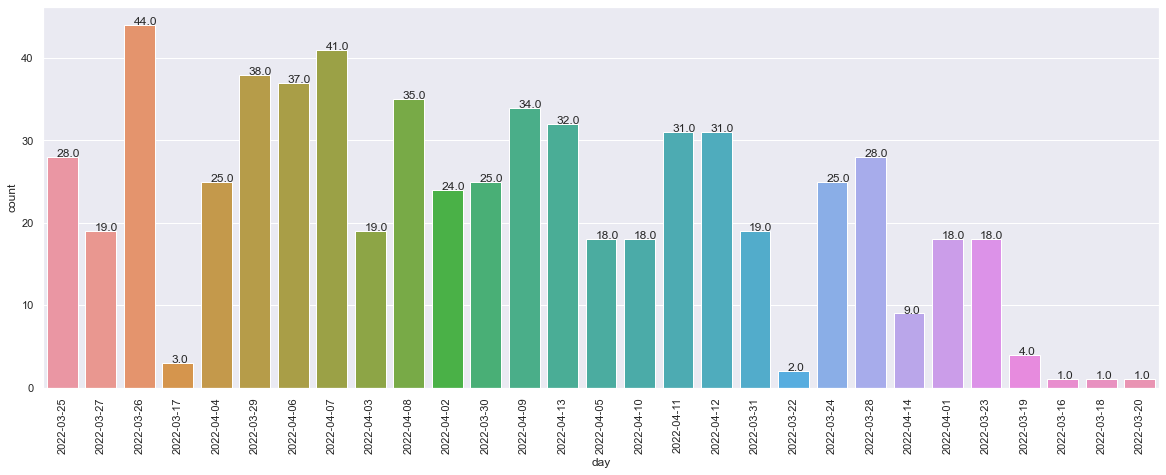

In [134]:
from datetime import datetime

# Rozkład score tweetów dnia
data['day'] = data['date'].apply(lambda x: x.split(" ")[0])

sns.set(rc = {'figure.figsize':(20,7)})
ax = sns.countplot(x="day", data=data)
ax.tick_params(axis='x', rotation=90)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(4,4))
ngrams = c_vec.fit_transform(data['cleaned_tweet'])
count_values = ngrams.toarray().sum(axis=0)
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'trigram/quadrigram'})

In [136]:
# trigram i quadrigram
df_ngram[:15]

,frequency,trigram/quadrigram
0,7,polski już nie ma
1,5,już nie ma jest
2,4,ukropolin pełną gębą przodkowie
3,4,to jeszcze polska czy
4,4,przodkowie się grobach przekręcają
5,4,pełną gębą przodkowie się
6,4,nie ma jest ukropolin
7,4,jest polska nie ukropolin
8,4,gębą przodkowie się grobach
9,3,ukropolin pislamizm ludzie trzeba


In [137]:
profiles = pd.read_excel("../../src/profile_ukraina.xlsx", header=1, sheet_name=0)

profiles = profiles[profiles['PLATFORMA']=='Twitter']["LINK PROFILU"]
threat_usernames = []
for profile in profiles:
    try:
        temp_profile = profile.partition("twitter.com/")[2].rstrip('/')
        if len(temp_profile) >= 4:
            threat_usernames.append(temp_profile)
    except:
        pass

c:\users\kubas\appdata\local\programs\python\python38\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [138]:
data['threat'] = data['username'].apply(lambda x: True if x in threat_usernames else False)
data[data['threat'] == True].sort_values(by='score', ascending=False)

,id,conversation_id,date,tweet,hashtags,user_id_str,username,name,link,urls,...,nlikes,nreplies,nretweets,search,reply_to,score,cleaned_tweet,tweet_lower,day,threat
330218,1507692797922533379,1507692797922533379,2022-03-26 13:15:49,Ukropolin pełną gębą. Przodkowie się w grobach...,[],1360507036799238145,KNerwosol,🄺🄰🄽🄰🄻🄸🄰💪🇵🇱 𝖂𝖆𝖙𝖆𝖍𝖆,https://twitter.com/KNerwosol/status/150769279...,[],...,116,9,37,ukropolin,[],162,Ukropolin pełną gębą. Przodkowie się w grobach...,ukropolin pełną gębą. przodkowie się w grobach...,2022-03-26,True
330235,1507524458172534790,1507524458172534790,2022-03-26 02:06:53,"W ten kraju, w ukrainie. Ten kraju już nie będ...",[],1053599002548158464,Krzychu74706173,"Dobry, Zły i Brzydki",https://twitter.com/Krzychu74706173/status/150...,[],...,68,6,14,ukropolin,[],88,"W ten kraju, w ukrainie. Ten kraju już nie będ...","w ten kraju, w ukrainie. ten kraju już nie będ...",2022-03-26,True
330223,1507677050374664197,1507677050374664197,2022-03-26 12:13:14,To jeszcze Polska czy już ukropolin? https://...,[],1360507036799238145,KNerwosol,🄺🄰🄽🄰🄻🄸🄰💪🇵🇱 𝖂𝖆𝖙𝖆𝖍𝖆,https://twitter.com/KNerwosol/status/150767705...,[],...,49,9,10,ukropolin,[],68,To jeszcze Polska czy już ukropolin?,to jeszcze polska czy już ukropolin? https://...,2022-03-26,True
978330,1511770847060664333,1511770847060664333,2022-04-06 20:20:31,"Prawi pisozjebani, to co, już oficjalnie w Pol...",[],1053599002548158464,Krzychu74706173,"Dobry, Zły i Brzydki",https://twitter.com/Krzychu74706173/status/151...,[],...,43,2,12,polsce,[],57,"Prawi pisozjebani, to co, już oficjalnie w Pol...","prawi pisozjebani, to co, już oficjalnie w pol...",2022-04-06,True
330202,1508016843373617152,1508016843373617152,2022-03-27 11:43:27,#HeyBarany🇺🇦 kiedy święta w #Ukropolin ? htt...,"['heybarany', 'ukropolin']",1319977800024182784,Baba_yaga_bum,Madame,https://twitter.com/Baba_yaga_bum/status/15080...,[],...,33,10,4,ukropolin,[],47,kiedy święta w ?,#heybarany🇺🇦 kiedy święta w #ukropolin ? htt...,2022-03-27,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424237,1514578359648464903,1514463214251253760,2022-04-14 14:16:35,@maradan24 @panzer_w1959 @prezydentpl @Andrzej...,[],1444714939025969153,Walker1865,Walker,https://twitter.com/Walker1865/status/15145783...,[],...,0,0,0,polacy,"[{'screen_name': 'maradan24', 'name': 'AN #Dud...",0,Nieprawda🤦 🤣🤣🤣 PiS niszczy Polskę.Niszczy gosp...,@maradan24 @panzer_w1959 @prezydentpl @andrzej...,2022-04-14,True
8313,1504461053391945734,1504393166262312967,2022-03-17 15:14:01,@MarioRebeliant @AnnaMada2 @lis_tomasz @jacek_...,[],2180706896,miejskiziom,Wiektoś ktoto,https://twitter.com/miejskiziom/status/1504461...,[],...,0,0,0,Wołyń,"[{'screen_name': 'MarioRebeliant', 'name': 'Ma...",0,Komitet Nauk Historycznych PAN odwołuję konkur...,@mariorebeliant @annamada2 @lis_tomasz @jacek_...,2022-03-17,True
490086,1509960279093874699,1509960279093874699,2022-04-01 20:25:58,"""Tydzień temu prof. #JacekBartyzel stwierdził,...","['jacekbartyzel', 'wojnanaukrainie', 'wieszwie...",3136166313,HanterPoen,HanterPoen ✝️🇵🇱 ‏,https://twitter.com/HanterPoen/status/15099602...,['https://prawy.pl/119021-tvp-ukraincy-rownopr...,...,0,0,0,ukropolin,[],0,"""Tydzień temu prof. stwierdził, że państwo pol...","""tydzień temu prof. #jacekbartyzel stwierdził,...",2022-04-01,True
1238499,1511791993365708805,1511791987674030083,2022-04-06 21:44:33,gdy zdychały stare Skrzeki. W Manifeście napis...,[],2539945646,Mandaryn62,Maciej Talarczyk🇷🇺💤,https://twitter.com/Mandaryn62/status/15117919...,['https://youtu.be/pFnQkbRwpXA'],...,0,0,0,ukropolin,[],0,gdy zdychały stare Skrzeki. W Manifeście napis...,gdy zdychały stare skrzeki. w manifeście napis...,2022-04-06,True


In [139]:
data[data['threat'] == True].sort_values(by='score', ascending=False)['score'].sum()/data.sort_values(by='score', ascending=False)['score'].sum()

0.2815718157181572

Zidentyfikowane przez nas konta odpowiadają za 28 procent wszystkich wpisów ze słowem kluczowym Ukropolin